In [1]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt

#Definir las funciones de activación y entrenamiento
# Función de activación (escalón)
def linear_function(x):
    return x

# Función para hacer predicciones(output)
def adaline_predict(X, weights):
    return linear_function(np.dot(X, weights[1:]) + 0*weights[0])

# Algoritmo del Perceptrón
def adaline_train(X, y, learning_rate, epochs):
    # Inicializar los pesos (uno más para el bias)
    weights = np.random.rand(X.shape[1] + 1)
    #vector de error
    errors = []

    # Entrenamiento
    for _ in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            # Calcular la salida (predicción)
            output = adaline_predict(xi,weights)#step_function(np.dot(xi, weights[1:]) + weights[0])
            # Calcular error absoluto
            error = (target - output)**2
            total_error += abs(error)
            # Actualizar los pesos
            update = 2*learning_rate * (target - output)
            weights[1:] += update * xi
            weights[0] += update
        errors.append(total_error)
    return weights,errors

(4985, 15)
Pesos entrenados: [-1.18338475e+00  4.42802211e+00  2.53472634e+00  1.11666401e+00
 -2.63807898e-01 -1.28493125e+00 -2.24045767e+00 -2.73695587e+00
 -2.87321708e+00 -2.45891729e+00 -1.65042588e+00 -1.30138302e+00
 -1.12954734e-04  1.23892416e+00  2.23375265e+00  4.23990287e+00]
Errores: [159.60226840484881, 119.00630789189792, 114.97189045240366, 108.27005048001465, 101.79463149989994, 95.6993845690774, 89.97124634136627, 84.5886074091542, 79.53061411295056, 74.77764236129701, 70.31125389375637, 66.11412628170672, 62.16998545984125, 58.46354224379437, 54.98043268753254, 51.707162053475784, 48.63105217679852, 45.74019201827155, 43.02339121246089, 40.470136429802736, 38.07055038206108, 35.815353311014626, 33.69582680992676, 31.703779836450874, 29.83151678421228, 28.07180748833109, 26.41785904772504, 24.863289354113064, 23.402102224330868, 22.028664038813936, 20.737681795007024, 19.524182489971793, 18.38349375167383, 17.311225643298123, 16.30325356952819, 15.355702218035386, 14

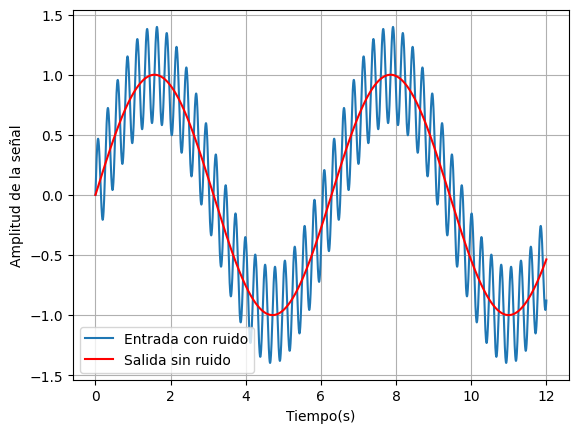

In [2]:

# Preparar los datos de entrada y salida
# Datos de entrada para el filtro adaptativo
#señal con ruido
n_samples = 5000
t = np.linspace(0,12,n_samples)
noise = 0.4*np.sin(24*t)#np.random.normal(0, 0.4, n_samples) #0.4*np.sin(24*t)
X = np.sin(t)+noise
plt.plot(t,X)
plt.grid()


# Salida esperada: señal sin ruido
y = np.sin(t)
plt.plot(t,y,'r')
plt.legend(["Entrada con ruido","Salida sin ruido"])
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud de la señal")


# Crear las entradas y la salida para ADALINE
delay = 15
noisy_signal = np.array([X[i:i+delay] for i in range(n_samples-delay)])
print(noisy_signal.shape)
d = y[delay:]


# Entrenar el perceptrón
weights,errors = adaline_train(noisy_signal, d, 0.01, 200)
print("Pesos entrenados:", weights)
print("Errores:", errors)


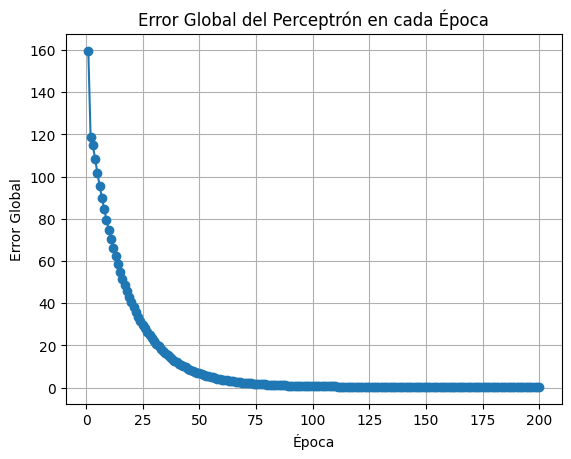

In [3]:

# Graficar el error global en cada época
plt.figure()
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Época')
plt.ylabel('Error Global')
plt.title('Error Global del Perceptrón en cada Época')
plt.grid(True)

In [4]:

#señal filtrada
prediction=np.zeros(noisy_signal.shape[0])
print("tamaño ", prediction.shape)
i = 0
for xi in noisy_signal:
    #print("prediccion ", i, " ",adaline_predict(xi, weights))
    prediction[i] = adaline_predict(xi, weights)
    i +=1

print("tamaños y ", prediction.shape)

tamaño  (4985,)
tamaños y  (4985,)


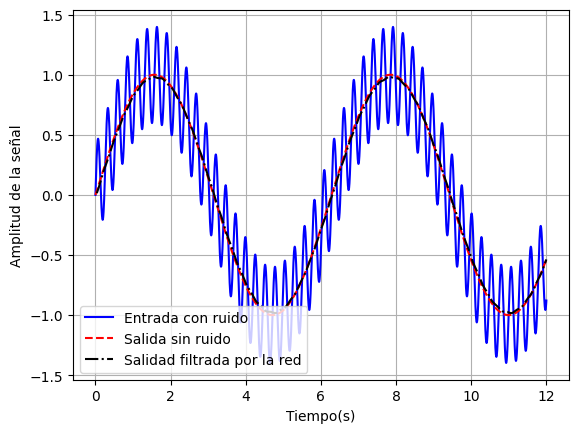

In [5]:
# Mostrar la gráfica
plt.figure()
plt.grid(True)
plt.plot(t,X,'b')
plt.plot(t,y,'--r')
plt.plot(t[delay:],prediction,'-.k')
plt.legend(["Entrada con ruido","Salida sin ruido",'Salidad filtrada por la red'])
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud de la señal")
plt.show()
